In [1]:
import json
import numpy as np
import os
import sys
from numpy.linalg import norm
from tkinter import *
from tkinter import messagebox as mb
from DataProcess import Text_To_Speech, read_Questions_and_Choices
from playsound import playsound
from threading import Thread
from sklearn.metrics.pairwise import cosine_similarity

import matplotlib.pyplot as plt
from IRT import *
from GUI_Design import *
from my_utils import *
from Recommendation_Algorithms_Data_Generation import *

sys.path.append('DeepIRT')
from Run_DeepIRT import cross_validation

from scipy.interpolate import interp1d
from scipy.interpolate import make_interp_spline

WARN: Could not locate executable g77
WARN: Could not locate executable f77
WARN: Could not locate executable ifort
WARN: Could not locate executable ifl
WARN: Could not locate executable f90
WARN: Could not locate executable DF
WARN: Could not locate executable efl
WARN: Could not locate executable gfortran
WARN: Could not locate executable f95
WARN: Could not locate executable g95
WARN: Could not locate executable efort
WARN: Could not locate executable efc
WARN: Could not locate executable flang
WARN: don't know how to compile Fortran code on platform 'nt'


WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
# Open Json file and read data
with open('Data/data.json', 'r', encoding="utf-8") as handle:
    Data = json.load(handle)

# Check the one of data
testConversation = list(Data[10325].keys())[0]
print(testConversation)
testConversation = list(Data[10].values())[0]
print(testConversation)

os.environ["KMP_DUBLICATE_LIB_OK"] = "True"
# Delete 10325
# Delete 10386



M: For years, many of us have relied on antibiotic use to treat various infections. And the reality is that antibiotics have been responsible for saving millions of lives since penicillin, one of the earliest antibiotics, was first used on a clinical basis 70 years ago. However, today is a new era in which taking antibiotics can cause some very dangerous and potentially life-threatening situations. With such a large life-threatening epidemic, it is sad to say that only 1. 2 percent of budgetary money for the National Institutes of Health is currently being spent on research to tackle this problem. This is a far cry from the funds necessary for a problem of such magnitude.
[{'What gesture do Bulgarians and Greeks use to express negative responses?': {"A. Nodding one's head***B. Waving one's hand***C. Holding up the forefinger. ***D. Turning the right thumb down.": 'A'}}, {'What is likely to offend Arab business people?': {"A. Looking away from them***B. Forming a circle with fingers***C

In [3]:
Initial_question = ["Is English your native language?", "How long have you been learning English?",
                    "How did you learn English?", "Have you ever taken an English proficiency test?", 
                    "How about the result?", "Which English proficiency level do you think you belong to?"]
Initial_choices = [['A. Yes', 'B. No'], 
                   ['A. No more than 3 years.', 'B. No more than 6 years.', 'C. No more than 9 years.', 'D. More than 9 years'], 
                   ['A. Learn it by internet source.', 'B. Teached by teacher.', 'C. Teached by Parents.', 'D.Not above'], 
                   ['A. Yes.', 'B. No'], 
                   ['A. Low level.', 'B. Medium Level.', 'C. High Level.', 'D. Professional Level.'], 
                   ['A. Low level.', 'B. Medium Level.', 'C. High Level.', 'D. Professional Level.']]

choices_weights = [[10,0],[1,3,5,7],[4,7,6,3],[3,0],[2,4,7,10],[2,3,4,5]]

Initial_Questionares = dict(zip(Initial_question, Initial_choices))
print(Initial_Questionares)

# with open('initial_questionnaire.json', 'w') as fp:
#     json.dump(Initial_Questionares, fp)
    
with open('Data/initial_questionnaire.json', 'r') as fp:
    initial_questionnaire = json.load(fp)
print(initial_questionnaire)

{'Is English your native language?': ['A. Yes', 'B. No'], 'How long have you been learning English?': ['A. No more than 3 years.', 'B. No more than 6 years.', 'C. No more than 9 years.', 'D. More than 9 years'], 'How did you learn English?': ['A. Learn it by internet source.', 'B. Teached by teacher.', 'C. Teached by Parents.', 'D.Not above'], 'Have you ever taken an English proficiency test?': ['A. Yes.', 'B. No'], 'How about the result?': ['A. Low level.', 'B. Medium Level.', 'C. High Level.', 'D. Professional Level.'], 'Which English proficiency level do you think you belong to?': ['A. Low level.', 'B. Medium Level.', 'C. High Level.', 'D. Professional Level.']}
{'Is English your native language?': ['A. Yes', 'B. No'], 'How long have you been learning English?': ['A. No more than 3 years.', 'B. No more than 6 years.', 'C. No more than 9 years.', 'D. More than 9 years'], 'How did you learn English?': ['A. Learn it by internet source.', 'B. Teached by teacher.', 'C. Teached by Parents

In [4]:
# print(len(list(Data)))

In [35]:
# Important Variable`
User_log_summary_data = []
# questions = list(initial_questionnaire.keys())
# choices = list(initial_questionnaire.values())
# # print(questions)
# # print(choices)

# initialWindow = Tk()
# initialWindow.geometry("800x500")
# initialWindow.title("Listening Conorehension Quiz")

# initial = Initial_Questionnaire(quizWindow=initialWindow, questions=questions, choices=choices)
# userAnswer = initial.selectedAnswers
# initialWindow.mainloop()
# print("Users answers: ", userAnswer)

# init_estimate_ability = compute_init_ability(userAnswer)
# print("Initial estimate ability: ", init_estimate_ability)

# # Record first value
# numeric_ans = []
# for ans in userAnswer:
#     if ans == 'A':
#         numeric_ans.append(1)
#     elif ans == 'B':
#         numeric_ans.append(2)
#     elif ans == 'C':
#         numeric_ans.append(3)
#     elif ans == 'D':
#         numeric_ans,append(4)
#     else:
#         numeric_ans.append(0)

# User_log_summary_data.append(numeric_ans)
init_estimate_ability = 1.2
User_log_summary_data.append(init_estimate_ability)
print(User_log_summary_data)

[1.2]


In [36]:
# User_Log_Summary = pd.read_csv("Data/User_Log_Summary.csv")
# getRecommendationByCF(dataf = Data, User_log=User_Log_Summary, new_user=[numeric_ans])

In [37]:
# To read a Difficulty Materials and to read all difficulties of materials
# Each Material maybe contains mutil questions, I set all question difficulty same as materials difficulties.
matDiff = pd.read_csv("Data/Diffculty Level/Mateials_diffculty_by_cluster_directely.csv")
print(len(np.array(list(matDiff["Materials Difficulty"])).shape))
quesDiff = getQuestionsDifficulty(dataf=Data, materialDifficultyLevelNor=list(matDiff["Materials Difficulty"]))
display(matDiff)
matDiff = list(matDiff["Materials Difficulty"])
print(matDiff)
print(quesDiff)

1


12447it [00:00, 48229.32it/s]


,Materials Difficulty
0,0.01
1,0.02
2,1.01
3,3.01
4,2.01
...,...
12442,0.49
12443,1.58
12444,0.50
12445,0.51


[0.01, 0.02, 1.01, 3.01, 2.01, 5.01, 0.03, 0.04, 0.05, 0.06, 4.01, 5.02, 2.02, 0.07, 0.08, 0.09, 3.02, 1.02, 1.03, 0.0999999999999999, 2.03, 1.04, 0.1099999999999999, 0.1199999999999999, 3.03, 1.05, 1.06, 3.04, 4.02, 0.1299999999999999, 0.1399999999999999, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 5.03, 4.03, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 1.07, 0.2700000000000001, 1.08, 1.09, 0.2800000000000001, 0.2900000000000001, 0.3000000000000001, 4.04, 1.1, 0.3100000000000001, 0.3200000000000001, 1.11, 0.3300000000000001, 0.3400000000000001, 0.3500000000000001, 4.05, 4.06, 5.04, 1.12, 0.3600000000000001, 0.3700000000000001, 0.3800000000000001, 2.04, 6.01, 0.3900000000000002, 5.05, 0.4000000000000002, 0.4100000000000002, 5.06, 5.07, 0.4200000000000002, 2.05, 1.13, 0.4300000000000002, 0.4400000000000002, 3.05, 1.14, 0.4500000000000002, 1.15, 0.4600000000000002, 2.06, 5.08, 1.16, 0.4700000000000002, 5.09, 0.4800000000000002, 6.02, 1.17, 0.4900000000000002, 3.06, 0.5000000000000002, 0.5100000000000002,

In [38]:
# matDiff = pd.read_csv("Data/Diffculty Level/Mateials_diffculty_discrimination_by_cluster_without_quesLen.csv")
# quesDiff = getQuestionsDifficulty(dataf=Data, materialDifficultyLevelNor=matDiff.values)
# display(matDiff)
# matDiff = matDiff.values
# print(matDiff)
# print(quesDiff)

In [39]:
# matDiff = pd.read_csv("Data/Diffculty Level/Mateials_diffculty_discrimination_by_cluster_with_quesLen.csv")
# quesDiff = getQuestionsDifficulty(dataf=Data, materialDifficultyLevelNor=matDiff.values)
# display(matDiff)
# matDiff = matDiff.values
# print(matDiff)
# print(quesDiff)

In [40]:
questionNumEachParts = 2

irt = Basic_IRT_Adptive_Recommendation(numberOfMaterials=questionNumEachParts, 
                                       materialDifficultyLevelNor=matDiff, 
                                       questionsDifficultyLevelNor=quesDiff, 
                                       init_ability=init_estimate_ability)

# To return all results from initial theta construction 
# questionNumEachParts = 2
# init_ability, new_ability, irt, init_select_items, init_correct_score = initial_theta(numberOfMaterials = questionNumEachParts, materialDifficultyLevelNor=matDiff, 
#                                                                         questionsDifficultyLevelNor=quesDiff)

# Set some variables to store all seletcted items, items difficulty, correct rate.
all_selected_items = []
all_selected_diff = []
correct_rate = []

# all_selected_items.extend(init_select_items)
# correct_rate.extend(init_correct_score)

# for j in init_select_items:
#     print("Selected Difficulty: ", matDiff[j])
# all_selected_diff.append(matDiff[j])

# Set some variables to store all once ability, whole ability.
all_once_abilities = []
all_whole_abilities = []
all_once_abilities.append(init_estimate_ability)
# all_whole_abilities.append(init_estimate_ability)

# To set number of parts the test, each test will contain 2 materials.
parts_num = 0
total_parts = 10

while parts_num != total_parts:
    respones_vector = []  
    
    select_items = irt.item_selctor_custmer()
    print("Selected Items: ", select_items)
    
    all_selected_items.extend(select_items)
    
    for j in select_items:
        print("Selected Difficulty: ", matDiff[j])
    all_selected_diff.append(matDiff[j])
    
    Questions, Choices, TrueAnswers, OutputPath = data_to_GUI(Data, select_items)

    print("init true answer: ", TrueAnswers)

    # Driver Code
    LastPart=False
    
    if parts_num == total_parts:
        LastPart=True
        
    app = ListeningComprehensionApp(manyQuestions=Questions, manyChoices=Choices, 
                                    manyTrueAnswers=TrueAnswers, manyOutputPath=OutputPath, 
                                    Recommendation=False, LastPart=LastPart)

    selected_answer = app.getAnswer()

    app.mainloop()

    parts_num += 1
    
    print(selected_answer)
    
    # To get the respones vector, which will used to as input of IRT ability estimator.
    respones_vector, correct_score= get_respones_vector(selected_answer=selected_answer, true_answer=TrueAnswers)

    
    recommendation_mode = 'DeepIRT'
    
    if recommendation_mode == 'IRT':
    
        respones_vector = np.array(respones_vector)
        respones_vector = np.array([[1 if i else 0] for i in respones_vector])
        correct_rate.extend(correct_score)

        print("respones vector: ", respones_vector)
        print("Correct rate: ", correct_rate)
        print("All seleccted materials: ", all_selected_items)
    
        # IRT estimate based on diffculty and discrimination
        new_ability_once, whole_ability = irt.IRT_ability_estimator(response_vector=respones_vector)
    elif recommendation_mode == 'MCMC':
        correct_rate.extend(correct_score)
        print("respones vector: ", respones_vector)
        print("Correct rate: ", correct_rate)
        print("All seleccted materials: ", all_selected_items)
        
        # MCMC estimate based on Bayes Maekvol chain.
        pred_diff, new_ability_once, whole_ability = irt.MCMC_ability_estimator(response_vector=respones_vector)
    elif recommendation_mode == 'DeepIRT':
        correct_rate.extend(correct_score)
        print("respones vector: ", respones_vector)
        print("Correct rate: ", correct_rate)
        print("All seleccted materials: ", all_selected_items)
        deepIRT_data = generate_DeepIRT_data(respones_vector=respones_vector, selected_items=select_items, 
                                             quesdiff=quesDiff, part_num=parts_num-1)
        print("deepIRT data: ", deepIRT_data)   
    
        abilities, diffs = cross_validation(num_of_data=1)
        ability = (sum(abilities[0])/len(abilities[0]) + 0.3)*7
        
        print("ability by DeepIRT: ", ability)
        irt.whole_ability = ability
        new_ability_once = ability
        whole_ability = ability
        
    all_once_abilities.append(new_ability_once)
    all_whole_abilities.append(whole_ability)
    print("Once ability: ", new_ability_once)
    print("Whole ability: ", whole_ability)
    
    if len(all_whole_abilities) > 3:
        if abs((sum(all_whole_abilities[-4:])/len(all_whole_abilities[-4:])) - whole_ability) < 0.2:
            break


Selected Items:  [4970, 658]
Selected Difficulty:  1.2
Selected Difficulty:  1.2
MoviePy - Writing audio in Data/Conversation mp3/index4970.mp3


MoviePy - Done.
MoviePy - Writing audio in Data/Conversation mp3/index658.mp3


MoviePy - Done.
init true answer:  [['C', 'A'], ['C']]


selected:  [['C', 'A'], ['C']]
True:  [['C', 'A'], ['C']]
selected len:  2


2023-08-21 23:15:48,540 - Deep-IRT-model - INFO - Cross Validation 1
2023-08-21 23:15:48,542 - Deep-IRT-model - INFO - Initializing Placeholder
2023-08-21 23:15:48,549 - Deep-IRT-model - INFO - Initializing Key and Value Memory
2023-08-21 23:15:48,591 - Deep-IRT-model - INFO - Initializing Q and QA Embedding
2023-08-21 23:15:48,619 - Deep-IRT-model - INFO - Initializing Embedding Lookup
2023-08-21 23:15:48,634 - Deep-IRT-model - INFO - Initializing Influence Procedure


[['C', 'A'], ['C']]
respones vector:  [True, True, True]
Correct rate:  [1.0, 1.0]
All seleccted materials:  [4970, 658]
deepIRT data:  [[2], [4970, 4970], [1, 1], [1], [658], [1]]


2023-08-21 23:15:49,108 - Deep-IRT-model - INFO - Initializing Loss Function
2023-08-21 23:15:50,457 - Deep-IRT-model - INFO - Memory/key_memory_matrix:0 (float32 10x10) [100, bytes: 400]
Memory/value_memory_matrix:0 (float32 10x20) [200, bytes: 800]
Embedding/q_embed:0 (float32 12444x10) [124440, bytes: 497760]
Embedding/qa_embed:0 (float32 24887x20) [497740, bytes: 1990960]
DKVMN-ValueHead/EraseOperation/weights:0 (float32 20x20) [400, bytes: 1600]
DKVMN-ValueHead/EraseOperation/biases:0 (float32 20) [20, bytes: 80]
DKVMN-ValueHead/AddOperation/weights:0 (float32 20x20) [400, bytes: 1600]
DKVMN-ValueHead/AddOperation/biases:0 (float32 20) [20, bytes: 80]
SummaryOperation/weights:0 (float32 30x10) [300, bytes: 1200]
SummaryOperation/biases:0 (float32 10) [10, bytes: 40]
StudentAbilityOutputLayer/weights:0 (float32 10x1) [10, bytes: 40]
StudentAbilityOutputLayer/biases:0 (float32 1) [1, bytes: 4]
QuestionDifficultyOutputLayer/weights:0 (float32 10x1) [10, bytes: 40]
QuestionDifficultyO

ability by DeepIRT:  2.5164226911962033
Once ability:  2.5164226911962033
Whole ability:  2.5164226911962033
Selected Items:  [12013, 3692]
Selected Difficulty:  2.5200000000000005
Selected Difficulty:  2.5200000000000005
MoviePy - Writing audio in Data/Conversation mp3/index12013.mp3


MoviePy - Done.
MoviePy - Writing audio in Data/Conversation mp3/index3692.mp3


MoviePy - Done.
init true answer:  [['A', 'C', 'B'], ['C', 'B', 'A']]
selected:  [['A', 'B', 'C'], ['C', 'B', 'A']]
True:  [['A', 'C', 'B'], ['C', 'B', 'A']]
selected len:  2


2023-08-21 23:16:15,685 - Deep-IRT-model - INFO - Cross Validation 1
2023-08-21 23:16:15,686 - Deep-IRT-model - INFO - Initializing Placeholder
2023-08-21 23:16:15,694 - Deep-IRT-model - INFO - Initializing Key and Value Memory
2023-08-21 23:16:15,741 - Deep-IRT-model - INFO - Initializing Q and QA Embedding
2023-08-21 23:16:15,768 - Deep-IRT-model - INFO - Initializing Embedding Lookup
2023-08-21 23:16:15,777 - Deep-IRT-model - INFO - Initializing Influence Procedure


[['A', 'B', 'C'], ['C', 'B', 'A']]
respones vector:  [True, False, False, True, True, True]
Correct rate:  [1.0, 1.0, 0.3333333333333333, 1.0]
All seleccted materials:  [4970, 658, 12013, 3692]
deepIRT data:  [[3], [12013, 12013, 12013], [1, 0, 0], [3], [3692, 3692, 3692], [1, 1, 1]]


2023-08-21 23:16:16,236 - Deep-IRT-model - INFO - Initializing Loss Function
2023-08-21 23:16:17,567 - Deep-IRT-model - INFO - Memory/key_memory_matrix:0 (float32 10x10) [100, bytes: 400]
Memory/value_memory_matrix:0 (float32 10x20) [200, bytes: 800]
Embedding/q_embed:0 (float32 12444x10) [124440, bytes: 497760]
Embedding/qa_embed:0 (float32 24887x20) [497740, bytes: 1990960]
DKVMN-ValueHead/EraseOperation/weights:0 (float32 20x20) [400, bytes: 1600]
DKVMN-ValueHead/EraseOperation/biases:0 (float32 20) [20, bytes: 80]
DKVMN-ValueHead/AddOperation/weights:0 (float32 20x20) [400, bytes: 1600]
DKVMN-ValueHead/AddOperation/biases:0 (float32 20) [20, bytes: 80]
SummaryOperation/weights:0 (float32 30x10) [300, bytes: 1200]
SummaryOperation/biases:0 (float32 10) [10, bytes: 40]
StudentAbilityOutputLayer/weights:0 (float32 10x1) [10, bytes: 40]
StudentAbilityOutputLayer/biases:0 (float32 1) [1, bytes: 4]
QuestionDifficultyOutputLayer/weights:0 (float32 10x1) [10, bytes: 40]
QuestionDifficultyO

ability by DeepIRT:  3.017894370853901
Once ability:  3.017894370853901
Whole ability:  3.017894370853901
Selected Items:  [5326, 9938]
Selected Difficulty:  3.02
Selected Difficulty:  3.02
MoviePy - Writing audio in Data/Conversation mp3/index5326.mp3


MoviePy - Done.
MoviePy - Writing audio in Data/Conversation mp3/index9938.mp3


MoviePy - Done.
init true answer:  [['A', 'A', 'B'], ['B', 'B', 'C']]
selected:  [['B', 'A', 'B'], ['B', 'B', 'C']]
True:  [['A', 'A', 'B'], ['B', 'B', 'C']]
selected len:  2


2023-08-21 23:16:41,332 - Deep-IRT-model - INFO - Cross Validation 1
2023-08-21 23:16:41,333 - Deep-IRT-model - INFO - Initializing Placeholder
2023-08-21 23:16:41,338 - Deep-IRT-model - INFO - Initializing Key and Value Memory
2023-08-21 23:16:41,381 - Deep-IRT-model - INFO - Initializing Q and QA Embedding
2023-08-21 23:16:41,408 - Deep-IRT-model - INFO - Initializing Embedding Lookup
2023-08-21 23:16:41,421 - Deep-IRT-model - INFO - Initializing Influence Procedure


[['B', 'A', 'B'], ['B', 'B', 'C']]
respones vector:  [False, True, True, True, True, True]
Correct rate:  [1.0, 1.0, 0.3333333333333333, 1.0, 0.6666666666666666, 1.0]
All seleccted materials:  [4970, 658, 12013, 3692, 5326, 9938]
deepIRT data:  [[3], [5326, 5326, 5326], [0, 1, 1], [3], [9938, 9938, 9938], [1, 1, 1]]


2023-08-21 23:16:41,917 - Deep-IRT-model - INFO - Initializing Loss Function
2023-08-21 23:16:43,351 - Deep-IRT-model - INFO - Memory/key_memory_matrix:0 (float32 10x10) [100, bytes: 400]
Memory/value_memory_matrix:0 (float32 10x20) [200, bytes: 800]
Embedding/q_embed:0 (float32 12444x10) [124440, bytes: 497760]
Embedding/qa_embed:0 (float32 24887x20) [497740, bytes: 1990960]
DKVMN-ValueHead/EraseOperation/weights:0 (float32 20x20) [400, bytes: 1600]
DKVMN-ValueHead/EraseOperation/biases:0 (float32 20) [20, bytes: 80]
DKVMN-ValueHead/AddOperation/weights:0 (float32 20x20) [400, bytes: 1600]
DKVMN-ValueHead/AddOperation/biases:0 (float32 20) [20, bytes: 80]
SummaryOperation/weights:0 (float32 30x10) [300, bytes: 1200]
SummaryOperation/biases:0 (float32 10) [10, bytes: 40]
StudentAbilityOutputLayer/weights:0 (float32 10x1) [10, bytes: 40]
StudentAbilityOutputLayer/biases:0 (float32 1) [1, bytes: 4]
QuestionDifficultyOutputLayer/weights:0 (float32 10x1) [10, bytes: 40]
QuestionDifficultyO

ability by DeepIRT:  1.9776356630648175
Once ability:  1.9776356630648175
Whole ability:  1.9776356630648175
Selected Items:  [10243, 5705]
Selected Difficulty:  2.0
Selected Difficulty:  2.0
MoviePy - Writing audio in Data/Conversation mp3/index10243.mp3


MoviePy - Done.
MoviePy - Writing audio in Data/Conversation mp3/index5705.mp3


MoviePy - Done.
init true answer:  [['B', 'B', 'C'], ['C', 'A', 'C']]
selected:  [['B', 'B', 'B'], ['C', 'A', 'C']]
True:  [['B', 'B', 'C'], ['C', 'A', 'C']]
selected len:  2


2023-08-21 23:17:02,964 - Deep-IRT-model - INFO - Cross Validation 1
2023-08-21 23:17:02,966 - Deep-IRT-model - INFO - Initializing Placeholder
2023-08-21 23:17:02,973 - Deep-IRT-model - INFO - Initializing Key and Value Memory
2023-08-21 23:17:03,014 - Deep-IRT-model - INFO - Initializing Q and QA Embedding
2023-08-21 23:17:03,047 - Deep-IRT-model - INFO - Initializing Embedding Lookup
2023-08-21 23:17:03,057 - Deep-IRT-model - INFO - Initializing Influence Procedure


[['B', 'B', 'B'], ['C', 'A', 'C']]
respones vector:  [True, True, False, True, True, True]
Correct rate:  [1.0, 1.0, 0.3333333333333333, 1.0, 0.6666666666666666, 1.0, 0.6666666666666666, 1.0]
All seleccted materials:  [4970, 658, 12013, 3692, 5326, 9938, 10243, 5705]
deepIRT data:  [[3], [10243, 10243, 10243], [1, 1, 0], [3], [5705, 5705, 5705], [1, 1, 1]]


2023-08-21 23:17:03,447 - Deep-IRT-model - INFO - Initializing Loss Function
2023-08-21 23:17:05,009 - Deep-IRT-model - INFO - Memory/key_memory_matrix:0 (float32 10x10) [100, bytes: 400]
Memory/value_memory_matrix:0 (float32 10x20) [200, bytes: 800]
Embedding/q_embed:0 (float32 12444x10) [124440, bytes: 497760]
Embedding/qa_embed:0 (float32 24887x20) [497740, bytes: 1990960]
DKVMN-ValueHead/EraseOperation/weights:0 (float32 20x20) [400, bytes: 1600]
DKVMN-ValueHead/EraseOperation/biases:0 (float32 20) [20, bytes: 80]
DKVMN-ValueHead/AddOperation/weights:0 (float32 20x20) [400, bytes: 1600]
DKVMN-ValueHead/AddOperation/biases:0 (float32 20) [20, bytes: 80]
SummaryOperation/weights:0 (float32 30x10) [300, bytes: 1200]
SummaryOperation/biases:0 (float32 10) [10, bytes: 40]
StudentAbilityOutputLayer/weights:0 (float32 10x1) [10, bytes: 40]
StudentAbilityOutputLayer/biases:0 (float32 1) [1, bytes: 4]
QuestionDifficultyOutputLayer/weights:0 (float32 10x1) [10, bytes: 40]
QuestionDifficultyO

ability by DeepIRT:  2.8905036273101965
Once ability:  2.8905036273101965
Whole ability:  2.8905036273101965
Selected Items:  [2826, 3688]
Selected Difficulty:  3.0
Selected Difficulty:  3.0
MoviePy - Writing audio in Data/Conversation mp3/index2826.mp3


MoviePy - Done.
MoviePy - Writing audio in Data/Conversation mp3/index3688.mp3


MoviePy - Done.
init true answer:  [['C', 'C', 'B'], ['B', 'C', 'B']]
selected:  [['C', 'C', 'B'], ['C', 'B', 'B']]
True:  [['C', 'C', 'B'], ['B', 'C', 'B']]
selected len:  2


2023-08-21 23:17:34,269 - Deep-IRT-model - INFO - Cross Validation 1
2023-08-21 23:17:34,272 - Deep-IRT-model - INFO - Initializing Placeholder
2023-08-21 23:17:34,280 - Deep-IRT-model - INFO - Initializing Key and Value Memory
2023-08-21 23:17:34,317 - Deep-IRT-model - INFO - Initializing Q and QA Embedding
2023-08-21 23:17:34,343 - Deep-IRT-model - INFO - Initializing Embedding Lookup
2023-08-21 23:17:34,352 - Deep-IRT-model - INFO - Initializing Influence Procedure


[['C', 'C', 'B'], ['C', 'B', 'B']]
respones vector:  [True, True, True, False, False, True]
Correct rate:  [1.0, 1.0, 0.3333333333333333, 1.0, 0.6666666666666666, 1.0, 0.6666666666666666, 1.0, 1.0, 0.3333333333333333]
All seleccted materials:  [4970, 658, 12013, 3692, 5326, 9938, 10243, 5705, 2826, 3688]
deepIRT data:  [[3], [2826, 2826, 2826], [1, 1, 1], [3], [3688, 3688, 3688], [0, 0, 1]]


2023-08-21 23:17:34,746 - Deep-IRT-model - INFO - Initializing Loss Function
2023-08-21 23:17:36,034 - Deep-IRT-model - INFO - Memory/key_memory_matrix:0 (float32 10x10) [100, bytes: 400]
Memory/value_memory_matrix:0 (float32 10x20) [200, bytes: 800]
Embedding/q_embed:0 (float32 12444x10) [124440, bytes: 497760]
Embedding/qa_embed:0 (float32 24887x20) [497740, bytes: 1990960]
DKVMN-ValueHead/EraseOperation/weights:0 (float32 20x20) [400, bytes: 1600]
DKVMN-ValueHead/EraseOperation/biases:0 (float32 20) [20, bytes: 80]
DKVMN-ValueHead/AddOperation/weights:0 (float32 20x20) [400, bytes: 1600]
DKVMN-ValueHead/AddOperation/biases:0 (float32 20) [20, bytes: 80]
SummaryOperation/weights:0 (float32 30x10) [300, bytes: 1200]
SummaryOperation/biases:0 (float32 10) [10, bytes: 40]
StudentAbilityOutputLayer/weights:0 (float32 10x1) [10, bytes: 40]
StudentAbilityOutputLayer/biases:0 (float32 1) [1, bytes: 4]
QuestionDifficultyOutputLayer/weights:0 (float32 10x1) [10, bytes: 40]
QuestionDifficultyO

ability by DeepIRT:  2.6220133836070696
Once ability:  2.6220133836070696
Whole ability:  2.6220133836070696


In [41]:
Number_of_questions_tested = len(all_selected_items)
Average_diffculty = sum(all_selected_diff) / len(all_selected_diff)
Test_estimation_ability = all_whole_abilities[-1]
Right_answers_index = []
Wrong_answers_index = []
for i, cr in enumerate(correct_rate):
    if cr > 0.74:
        Right_answers_index.append(all_selected_items[i])
    else:
        Wrong_answers_index.append(all_selected_items[i])

material_feature_path = "Data/Material Features For ML/Material_Features_For_ML.csv"
material_features = loadMaterialsFeaturesForML(material_feature_path)

Max_topics_right = max(list(material_features.iloc[Right_answers_index]["Topics"]), 
                       key=list(material_features.iloc[Right_answers_index]["Topics"]).count)
Max_topics_wrong = max(list(material_features.iloc[Wrong_answers_index]["Topics"]), 
                       key=list(material_features.iloc[Wrong_answers_index]["Topics"]).count)

User_log_summary_data.extend([Number_of_questions_tested, Average_diffculty, 
                              Test_estimation_ability, Right_answers_index, Wrong_answers_index, 
                              Max_topics_right, Max_topics_wrong])
print(User_log_summary_data)

[1.2, 10, 2.348, 2.6220133836070696, [4970, 658, 3692, 9938, 5705, 2826], [12013, 5326, 10243, 3688], 4, 4]


In [42]:
def plot_ICC(abilities, diff, disc, guess):
    ability_range = np.arange(-1, 6, 0.01)
    i=0.01
    probs_correct = []
    row_name = []
    for a,b,c,ability in zip(diff, disc, guess, abilities):
        prob_correct = ipe.logistic3PLabc(a=a, b=b, c=c, theta=ability_range)
        
        intersection_idx = np.argwhere(np.diff(np.sign(ability_range - ability))).flatten()
        
        label = "{} parts test".format(int(i))
        plt.plot(ability_range, prob_correct, label=label)
        i=i+1
        
        plt.vlines(ability, ymin=0, ymax=1, colors='green', linestyles='--')
        plt.hlines(prob_correct[intersection_idx], xmin=ability-1.5, xmax=ability+1.5, colors='green', linestyles='--')
        plt.plot(ability_range[intersection_idx], prob_correct[intersection_idx], 'ro')

        row_name.append(label)
        probs_correct.extend(prob_correct[intersection_idx])
        
        #anotation = "prob: {:.1f}".format(prob_correct[intersection_idx][0])
        #plt.annotate(anotation, (ability_range[intersection_idx]-0.5, prob_correct[intersection_idx]), textcoords="offset points",xytext=(0,10),ha="center")
        
        plt.legend()
        plt.xlabel("user ability")
        plt.ylabel("probability of correctly answering")
        
        plt.savefig('D:/Master in UoB/TB3 of UoB/Report/Draw Diagram/CAT test Plot/ICC Curve Deep IRT_7')
        
    intersection_df = pd.DataFrame({"ability": abilities, 
                                    "Probs Correcting Answering": probs_correct},index=row_name)  
    # display(intersection_df)
    return intersection_df

[1.2, 2.5200000000000005, 3.02, 2.0, 3.0]
[2.5164226911962033, 3.017894370853901, 1.9776356630648175, 2.8905036273101965, 2.6220133836070696]


,ability,Probs Correcting Answering,Real Correcting Rate,Difference
0 parts test,2.516423,0.859603,1.000000,0.140397
1 parts test,3.017894,0.993727,0.666667,0.327060
2 parts test,1.977636,0.949281,0.833333,0.115947
3 parts test,2.890504,0.977687,0.833333,0.144353
4 parts test,2.622013,0.992309,0.666667,0.325642


[1.2, 10, 2.348, 2.6220133836070696, [4970, 658, 3692, 9938, 5705, 2826], [12013, 5326, 10243, 3688], 4, 4, 0.21068000256969902]


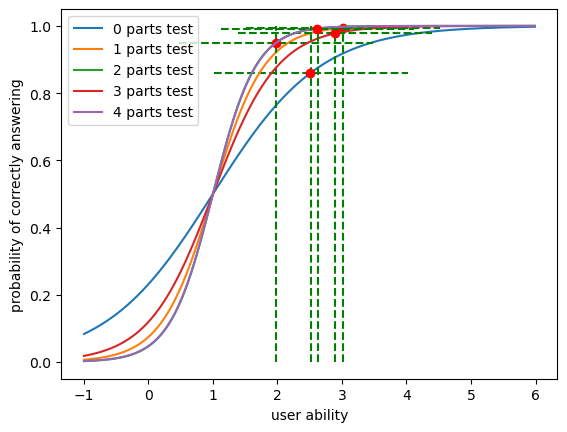

In [43]:
# Plot the ICC curve and show some important interesection.
# Those intersection is not clear in plot, so the data frame record all intersection.
print(all_selected_diff)
print(all_whole_abilities)

# all_selected_diff = [1.2, 3.86, 4.07, 3.09, 2.75, 2.66, 2.77]
# all_whole_abilities = [1.2, 3.86, 4.07, 3.09, 2.75, 2.66, 2.77]
# # all_whole_abilities = [4.564422398805618, 3.3388218046166003, 4.874367818236351, 
# #                        3.798125024884939, 3.4501763358712196, 3.3613393008708954, 3.4650514537934214]

# correct_rate = [0.75, 0.5, 0.28, 0.87, 0.66, 0.66, 0.5]

all_selected_diff = all_selected_diff

if len(np.array(all_selected_diff).shape) == 2:
    diff=[]
    disc=[]
    for i in all_selected_diff:
        a = list(i)
        diff.append(a[1])
        disc.append(a[0])

if len(np.array(all_selected_diff).shape) == 1:
    diff = all_selected_diff
    disc = [1]*len(diff)
    
guess = [0]*len(diff)
# abilities = all_whole_abilities[0:-1]

intersection_df = plot_ICC(diff=diff, disc=disc, guess=guess, abilities=all_whole_abilities)

loc_start = 0
loc_end = 2
correct_rate_by_parts = []
while len(correct_rate_by_parts) != (len(correct_rate) / 2):
    correct_rate_by_parts.append(sum(correct_rate[loc_start:loc_end]) / 2)
    loc_start = loc_start + 2
    loc_end = loc_end + 2
    
intersection_df["Real Correcting Rate"] = correct_rate_by_parts

difference = []
for probs, real in zip(intersection_df["Probs Correcting Answering"], correct_rate_by_parts):
    difference.append(abs(probs-real))

intersection_df["Difference"] = difference
display(intersection_df) 

ICC_evaluate_acc = sum(difference) / len(difference)
User_log_summary_data.append(ICC_evaluate_acc)
print(User_log_summary_data)
# plt.savefig('D:/Master in UoB/TB3 of UoB/Report/Draw Diagram/CAT test Plot/expect_real_score')

1.32


,final score,total score,user correct rate,user part ability,ability rate,user expected score rate,user score rate
part.1,9.00,9.00,1.000000,2.516423,0.503285,0.034736,0.040409
part.2,34.24,51.36,0.666667,3.017894,0.603579,0.263893,0.194145
part.3,50.30,60.36,0.833333,1.977636,0.395527,0.521160,0.419989
part.4,35.00,42.00,0.833333,2.890504,0.578101,0.705530,0.577137
part.5,40.00,60.00,0.666667,2.622013,0.524403,0.972855,0.756735


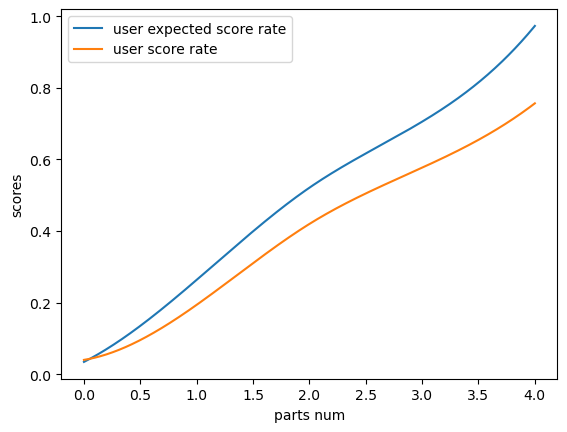

In [44]:
# This code part will show the ability change and the basic user's scores. 
# Through this way, to compare ability and the scores user's get, which can be used to evaluate the IRT's result.

question_score, material_score = getQuestionsScore(quesDiff)
print(material_score[10242])
final_score = 0
total_score = 0

part_final_score = 0
part_total_score = 0

parts_final_score = []
parts_total_score = []
parts_user_score = []
ability_rate = []

# all_whole_abilities_by_last_2_parts = all_whole_abilities[1:]


part_flag = 0
for ans, item in zip(correct_rate, all_selected_items):

    part_final_score = part_final_score + (material_score[item]*len(question_score[item])*ans)
#     final_score = final_score + material_score[item]
    
    part_total_score = part_total_score + (material_score[item]*len(question_score[item]))
    total_score = total_score + (material_score[item]*len(question_score[item]))
    
    part_flag += 1

    if part_flag == 2:
        parts_final_score.append(part_final_score)
        parts_total_score.append(part_total_score)
        parts_user_score.append(part_final_score / part_total_score)
        
        part_final_score = 0
        part_total_score = 0

        part_flag = 0    
    
# parts_final_score.append(final_score)
# parts_total_score.append(total_score)
# parts_user_score.append(final_score / total_score)

probs_correct = list(intersection_df["Probs Correcting Answering"].values)

rowname = []
user_score_rate = []
user_expected_score_rate = []
parts_expected_score = 0

for i, one_ability in enumerate(all_whole_abilities):
    name = "part."+ str(i+1)
    rowname.append(name)
    parts_expected_score += probs_correct[i] * parts_total_score[i]
    ability_rate.append((one_ability) / 5)
    user_score_rate.append(sum(parts_final_score[:i+1]) / total_score)
    user_expected_score_rate.append(parts_expected_score/total_score)
    
score_distribution = pd.DataFrame({"final score": parts_final_score,
                                   "total score": parts_total_score,
                                   "user correct rate":parts_user_score,
                                   "user part ability": all_whole_abilities,
                                   "ability rate": ability_rate,
                                   'user expected score rate':user_expected_score_rate,
                                   "user score rate": user_score_rate
                                  },index=rowname)

display(score_distribution)

Basic_score_evaluate = abs(ability_rate[-1] - user_score_rate[-1])
User_log_summary_data.append(Basic_score_evaluate)

x = range(len(all_whole_abilities))
y_score = user_score_rate
# y_ability = ability_rate

cubic_interpolation_model_y = interp1d(x, y_score, kind = "cubic")
cubic_interpolation_model_user = interp1d(x, user_expected_score_rate, kind = "cubic")

# Plotting the Graph
X_=np.linspace(min(x), max(x), 500)

Y_y = cubic_interpolation_model_y(X_)
Y_user = cubic_interpolation_model_user(X_)

plt.plot(X_, Y_user, label='user expected score rate')
plt.plot(X_, Y_y, label='user score rate')
plt.xlabel('parts num')
plt.ylabel('scores')
plt.legend()
plt.savefig('D:/Master in UoB/TB3 of UoB/Report/Draw Diagram/CAT test Plot/expect_real_score_deepIRT_7')

In [37]:
# Call the recommendation function
material_feature_path = "Data/Material Features For ML/Material_Features_For_ML_cluster_dir.csv"
matDiffPath = "Data/Diffculty Level/Mateials_diffculty_by_cluster_directely.csv"
Questions, Choices, TrueAnswers, OutputPath, top_n_questions_index, top_n_right, top_n_wrong = getRecommendationQuestions(material_feature_path=material_feature_path, 
                                                                         matDiffPath=matDiffPath, dataf=Data, 
                                                                         correct_rate=correct_rate, 
                                                                         all_selected_items=all_selected_items, 
                                                                         ability=all_whole_abilities[-1], 
                                                                         n_expectations=5, 
                                                                         recom_algo="Decision_tree")
User_log_summary_data.extend([top_n_right, top_n_wrong])

app = ListeningComprehensionApp(manyQuestions=Questions, manyChoices=Choices, 
                                manyTrueAnswers=TrueAnswers, manyOutputPath=OutputPath, Recommendation=True, LastPart=False)
app.mainloop()

12447it [00:00, 590023.98it/s]


12427
(12427, 3)
12427


,Material Index,Materials Difficulty,Questions Numbers,Topics
1,1,0.02,1,4
3,3,3.01,3,2
4,4,2.01,3,0
5,5,5.01,4,4
6,6,0.03,1,3
7,7,0.04,1,0
8,8,0.05,1,3
9,9,0.06,1,3
11,11,5.02,4,0
14,14,0.08,1,4


5584
297
834
0
8704
6431
8524
8436
0
5239
1723
MoviePy - Writing audio in Data/Conversation mp3/index8896.mp3


MoviePy - Done.
MoviePy - Writing audio in Data/Conversation mp3/index10048.mp3


MoviePy - Done.


MoviePy - Writing audio in Data/Conversation mp3/index6660.mp3


MoviePy - Done.
MoviePy - Writing audio in Data/Conversation mp3/index3685.mp3


MoviePy - Done.
MoviePy - Writing audio in Data/Conversation mp3/index1841.mp3


MoviePy - Done.
MoviePy - Writing audio in Data/Conversation mp3/index3185.mp3


MoviePy - Done.
MoviePy - Writing audio in Data/Conversation mp3/index11029.mp3


MoviePy - Done.


MoviePy - Writing audio in Data/Conversation mp3/index11862.mp3


MoviePy - Done.


MoviePy - Writing audio in Data/Conversation mp3/index3352.mp3


MoviePy - Done.


MoviePy - Writing audio in Data/Conversation mp3/index2040.mp3


MoviePy - Done.
MoviePy - Writing audio in Data/Conversation mp3/index11068.mp3


MoviePy - Done.


In [55]:
# Using similarity to evaluate the performance of recommendation algorithms
def get_similarity(selected_items_index, selected_items_answers, reocmmendation_items_index, material_features_path):
    
    material_features = loadMaterialsFeaturesForML(material_features_path)
    
    selected_items = material_features.iloc[selected_items_index]
    recommendation_items = material_features.iloc[reocmmendation_items_index]
    
    selected_items['type'] = ['test']*selected_items.shape[0]
    recommendation_items['type'] = ['recommendation']*len(recommendation_items.index)
    
    selected_items["Answers"] = selected_items_answers
    
    min_distance = []
    max_distance = []
    closest_index = []
    farest_index = []
    mean_distance = []
    for selected_row in selected_items[["Materials Difficulty", "Questions Numbers", "Topics"]].values:
        temp_distance = []
        for recom_row in recommendation_items[["Materials Difficulty", "Questions Numbers", "Topics"]].values:
            temp_distance.append(np.dot(selected_row, recom_row)/(norm(selected_row)*norm(recom_row)))
        min_distance.append(min(temp_distance))
        closest_index.append(recommendation_items['Material Index'].iloc[np.argmin(temp_distance)])
        max_distance.append(max(temp_distance))
        farest_index.append(recommendation_items['Material Index'].iloc[np.argmax(temp_distance)])        
        mean_distance.append(sum(temp_distance)/len(temp_distance))
        
    selected_items["min_similarity"] = min_distance
    selected_items["closest_index"] = closest_index
    selected_items["max_similarity"] = max_distance
    selected_items["farest_index"] = farest_index    
    selected_items["mean_similarity"] = mean_distance
    
    min_distance = []
    max_distance = []
    closest_index = []
    farest_index = []
    mean_distance = []
    for recom_row in recommendation_items[["Materials Difficulty", "Questions Numbers", "Topics"]].values:
        temp_distance = []
        for selected_row in selected_items[["Materials Difficulty", "Questions Numbers", "Topics"]].values:
            temp_distance.append(np.dot(selected_row, recom_row)/(norm(selected_row)*norm(recom_row)))
        min_distance.append(min(temp_distance))
        closest_index.append(selected_items['Material Index'].iloc[np.argmin(temp_distance)])
        max_distance.append(max(temp_distance))
        farest_index.append(selected_items['Material Index'].iloc[np.argmax(temp_distance)])  
        mean_distance.append(sum(temp_distance)/len(temp_distance))
    
    recommendation_items["min_similarity"] = min_distance
    recommendation_items["closest_index"] = closest_index    
    recommendation_items["max_similarity"] = max_distance
    recommendation_items["farest_index"] = farest_index    
    recommendation_items["mean_similarity"] = mean_distance   
    
    print(selected_items[["Materials Difficulty", "Questions Numbers", "Topics"]].values)
    recommendation_items[["Materials Difficulty", "Questions Numbers", "Topics"]].values
    
    selected_recomm_items = pd.concat([selected_items, recommendation_items])
    
#     display(selected_items)
#     display(recommendation_items)
    display(selected_recomm_items)


In [61]:
item_sele = []
items_answers = []
material_feature_path = "Data/Material Features For ML/Material_Features_For_ML_cluster_dir.csv"

all_selected_items = [658, 11181, 1639, 2138, 7342, 7229, 11634, 11115, 2937, 6217, 
                      281, 4131, 9094, 5537, 7303, 4579, 11262, 9268, 8778, 11043]
items_answers = [0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0 ,1, 0, 0]
# correct_rate = [0.5, 0.5, 1.0, 1.0, 1.0, 0.83, 0.5, 0.83, 0.66, 0.25]
# Logistic
top_n_questions_index = [8768, 8896, 10048, 11037, 9263, 1841, 3185, 3352, 11257, 2040, 4573]
topn_n_wrong_logis = [8768, 11037, 9263, 11257, 4573]
# Decision tree
top_n_questions_index = [8896, 10048, 6660, 3685, 1841, 3185, 11029, 11862, 3352, 2040, 11068]
topn_n_wrong_dices = [6660, 3685, 11029, 11862, 11068]
# NN
top_n_questions_index = [8896, 10048, 4554, 5323, 4556, 1841, 3185, 3699, 3352, 2040, 9951]
top_n_questions_nn = [4554, 5323, 4556, 3699, 9951]

Recom_by_Right = [8896, 10048, 1841, 3185, 3352, 2040]

Right_items = [11181, 2138, 7342, 7229, 11634, 11115, 2937, 6217, 4131, 7303, 9268]
Right_answer = [1,1,1,1,1,1,1,1,1,1,1]

Wrong_items = [658, 1639, 281, 9094, 4579, 5537, 11262, 8778, 11043]
Wrong_answer = [0,0,0,0,0,0,0,0,0]
# for co, item_index in zip(correct_rate, all_selected_items):
#     if co < 0.74:
#         items_answers.append(0)
#     else:
#         items_answers.append(1)
#         item_sele.append(item_index)

get_similarity(selected_items_index=all_selected_items,
               selected_items_answers = items_answers,
               reocmmendation_items_index=top_n_questions_index, 
               material_features_path=material_feature_path)

get_similarity(selected_items_index=Right_items,
                     selected_items_answers = Right_answer,
                     reocmmendation_items_index=Recom_by_Right, 
                     material_features_path=material_feature_path)
# Logistic
print("Logictic")
get_similarity(selected_items_index=Wrong_items,
                     selected_items_answers = Wrong_answer,
                     reocmmendation_items_index=topn_n_wrong_logis, 
                     material_features_path=material_feature_path)

# Decision Tree
print("Decision tree")
get_similarity(selected_items_index=Wrong_items,
                     selected_items_answers = Wrong_answer,
                     reocmmendation_items_index=topn_n_wrong_dices, 
                     material_features_path=material_feature_path)
# Decision Tree
print("NN")
get_similarity(selected_items_index=Wrong_items,
                     selected_items_answers = Wrong_answer,
                     reocmmendation_items_index=top_n_questions_nn, 
                     material_features_path=material_feature_path)

Similarity_evaluate = "No Result Now"
User_log_summary_data.append(Similarity_evaluate)

[[1.2  1.   0.  ]
 [1.2  2.   4.  ]
 [0.69 1.   2.  ]
 [0.69 1.   4.  ]
 [0.69 1.   0.  ]
 [0.69 1.   0.  ]
 [1.13 2.   4.  ]
 [1.13 2.   1.  ]
 [1.68 2.   4.  ]
 [1.68 2.   4.  ]
 [2.16 3.   4.  ]
 [2.16 3.   4.  ]
 [2.55 3.   4.  ]
 [2.55 3.   4.  ]
 [2.55 3.   0.  ]
 [2.55 3.   0.  ]
 [2.69 3.   1.  ]
 [2.69 3.   0.  ]
 [3.   2.   4.  ]
 [3.   3.   0.  ]]


,Material Index,Materials Difficulty,Questions Numbers,Topics,type,Answers,min_similarity,closest_index,max_similarity,farest_index,mean_similarity
658,658,1.20,1,0,test,0.0,0.244842,5323,0.993641,1841,0.583245
11181,11181,1.20,2,4,test,1.0,0.449014,2040,0.999860,4556,0.877242
1639,1639,0.69,1,2,test,0.0,0.476814,2040,0.998547,4556,0.883990
2138,2138,0.69,1,4,test,1.0,0.266908,2040,0.998871,5323,0.822800
7342,7342,0.69,1,0,test,1.0,0.265253,5323,0.926833,1841,0.574177
7229,7229,0.69,1,0,test,1.0,0.265253,5323,0.926833,1841,0.574177
11634,11634,1.13,2,4,test,1.0,0.437874,2040,0.999998,4556,0.874246
11115,11115,1.13,2,1,test,1.0,0.630005,5323,0.958638,9951,0.788733
2937,2937,1.68,2,4,test,1.0,0.520331,2040,0.996221,3185,0.892313
6217,6217,1.68,2,4,test,1.0,0.520331,2040,0.996221,3185,0.892313


[[1.2  2.   4.  ]
 [0.69 1.   4.  ]
 [0.69 1.   0.  ]
 [0.69 1.   0.  ]
 [1.13 2.   4.  ]
 [1.13 2.   1.  ]
 [1.68 2.   4.  ]
 [1.68 2.   4.  ]
 [2.16 3.   4.  ]
 [2.55 3.   0.  ]
 [2.69 3.   0.  ]]


,Material Index,Materials Difficulty,Questions Numbers,Topics,type,Answers,min_similarity,closest_index,max_similarity,farest_index,mean_similarity
11181,11181,1.20,2,4,test,1.0,0.449014,2040,0.983090,3185,0.801441
2138,2138,0.69,1,4,test,1.0,0.266908,2040,0.982096,10048,0.727699
7342,7342,0.69,1,0,test,1.0,0.384737,10048,0.926833,1841,0.631799
7229,7229,0.69,1,0,test,1.0,0.384737,10048,0.926833,1841,0.631799
11634,11634,1.13,2,4,test,1.0,0.437874,2040,0.980300,3185,0.796180
11115,11115,1.13,2,1,test,1.0,0.701466,10048,0.841494,8896,0.784974
2937,2937,1.68,2,4,test,1.0,0.520331,2040,0.996221,3185,0.831922
6217,6217,1.68,2,4,test,1.0,0.520331,2040,0.996221,3185,0.831922
4131,4131,2.16,3,4,test,1.0,0.628581,2040,0.985901,3185,0.849463
7303,7303,2.55,3,0,test,1.0,0.398570,10048,0.959831,1841,0.651762


Logictic
[[1.2  1.   0.  ]
 [0.69 1.   2.  ]
 [2.16 3.   4.  ]
 [2.55 3.   4.  ]
 [2.55 3.   0.  ]
 [2.55 3.   4.  ]
 [2.69 3.   1.  ]
 [3.   2.   4.  ]
 [3.   3.   0.  ]]


,Material Index,Materials Difficulty,Questions Numbers,Topics,type,Answers,min_similarity,closest_index,max_similarity,farest_index,mean_similarity
658,658,1.20,1,0,test,0.0,0.250530,9263,0.887719,11257,0.696049
1639,1639,0.69,1,2,test,0.0,0.446877,4573,0.962662,9263,0.651010
281,281,2.16,3,4,test,0.0,0.577149,4573,0.928974,11037,0.736971
9094,9094,2.55,3,4,test,0.0,0.564922,4573,0.949785,11037,0.735037
4579,4579,2.55,3,0,test,0.0,0.281345,9263,0.953285,11257,0.752150
5537,5537,2.55,3,4,test,0.0,0.564922,4573,0.949785,11037,0.735037
11262,11262,2.69,3,1,test,0.0,0.497002,9263,0.940162,11037,0.793066
8778,8778,3.00,2,4,test,0.0,0.409385,4573,0.953611,11037,0.651836
11043,11043,3.00,3,0,test,0.0,0.267793,9263,0.925755,11257,0.728360
8768,8768,0.22,1,0,recommendation,NaN,0.480704,1639,0.883299,4579,0.687399


Decision tree
[[1.2  1.   0.  ]
 [0.69 1.   2.  ]
 [2.16 3.   4.  ]
 [2.55 3.   4.  ]
 [2.55 3.   0.  ]
 [2.55 3.   4.  ]
 [2.69 3.   1.  ]
 [3.   2.   4.  ]
 [3.   3.   0.  ]]


,Material Index,Materials Difficulty,Questions Numbers,Topics,type,Answers,min_similarity,closest_index,max_similarity,farest_index,mean_similarity
658,658,1.20,1,0,test,0.0,0.212144,11862,0.875560,6660,0.503806
1639,1639,0.69,1,2,test,0.0,0.505260,6660,0.997641,11068,0.870622
281,281,2.16,3,4,test,0.0,0.657250,6660,0.990388,3685,0.874912
9094,9094,2.55,3,4,test,0.0,0.663048,6660,0.991904,3685,0.864963
4579,4579,2.55,3,0,test,0.0,0.247976,11029,0.945184,6660,0.538441
5537,5537,2.55,3,4,test,0.0,0.663048,6660,0.991904,3685,0.864963
11262,11262,2.69,3,1,test,0.0,0.465175,11862,0.908644,6660,0.683062
8778,8778,3.00,2,4,test,0.0,0.548422,6660,0.953205,3685,0.825669
11043,11043,3.00,3,0,test,0.0,0.232532,11862,0.915703,6660,0.524026
6660,6660,0.39,1,0,recommendation,NaN,0.505260,1639,0.945184,4579,0.742458


NN
[[1.2  1.   0.  ]
 [0.69 1.   2.  ]
 [2.16 3.   4.  ]
 [2.55 3.   4.  ]
 [2.55 3.   0.  ]
 [2.55 3.   4.  ]
 [2.69 3.   1.  ]
 [3.   2.   4.  ]
 [3.   3.   0.  ]]


,Material Index,Materials Difficulty,Questions Numbers,Topics,type,Answers,min_similarity,closest_index,max_similarity,farest_index,mean_similarity
658,658,1.20,1,0,test,0.0,0.244842,5323,0.742289,9951,0.478465
1639,1639,0.69,1,2,test,0.0,0.944376,9951,0.998547,4556,0.967975
281,281,2.16,3,4,test,0.0,0.886951,5323,0.998350,4554,0.948759
9094,9094,2.55,3,4,test,0.0,0.868904,5323,0.999980,4554,0.938913
4579,4579,2.55,3,0,test,0.0,0.259936,5323,0.767212,9951,0.499499
5537,5537,2.55,3,4,test,0.0,0.868904,5323,0.999980,4554,0.938913
11262,11262,2.69,3,1,test,0.0,0.482542,5323,0.895592,9951,0.681467
8778,8778,3.00,2,4,test,0.0,0.857215,3699,0.980148,4554,0.920184
11043,11043,3.00,3,0,test,0.0,0.253747,5323,0.758236,9951,0.491380
4554,4554,2.51,3,4,recommendation,NaN,0.687941,658,0.999980,9094,0.876091


In [16]:
print(User_log_summary_data)

[1.2, 20, 1.923, 2.219075979979197, [10672, 4679, 9672, 10152], [1053, 2667, 5845, 241, 4122, 6813, 9277, 10243, 6783, 7645, 9563, 5930, 5134, 8757, 7808, 2401], 4, 0, 0.3203446591423048, 0.19818158652419093, [6920, 11897, 1050, 316], array([ 6173,  9556, 10136,  7802,  4118], dtype=int64), 'No Result Now']


In [17]:
User_log_summary_keys = ["Questionnare Choices", "Initial Ability", "Number of Listening materials", "Average Difficulty", 
                         "Tested ability", "Correct Answers Indices", "Wrong Answer Indices", 
                         "Max Topics of Right", "Max Topics of Wrong", "ICC evaluate Acc", "Basic Score evaluate", 
                         "Recommendation by Correct Answer", "Recommendation by Wrong Answer", "Similarity evaluate"]
User_Log_Summary = pd.read_csv("Data/User_Log_Summary.csv")

User_Log_Summary2 = User_Log_Summary.append(pd.DataFrame(data=[User_log_summary_data], 
                                                         columns=User_log_summary_keys, index=[len(User_Log_Summary)]))
display(User_Log_Summary2)
User_Log_Summary2.to_csv("Data/User_Log_Summary.csv", index=False)

ValueError: 14 columns passed, passed data had 13 columns